## 2.1 What is Scikit-Learn
![image](https://user-images.githubusercontent.com/43855029/114609814-30db9f80-9c6d-11eb-8d4e-781f578e1d79.png)

- Scikit-learn is probably the most useful library for machine learning in Python.
    - The sklearn library contains a lot of efficient tools for machine learning and statistical modeling including classification, regression, clustering and dimensionality reduction.
- The sklearn package contains tools for:

```
- data splitting
- pre-processing
- feature selection
- model tuning using resampling
- variable importance estimation
as well as other functionality.

```

## 2.2 Install sklearn
We have installed kernel **ML_SKLN** which contains the scikit-learn package in M2. More information can be found in the setup page


## 2.3 Pre-processing using sklearn
There are several steps that we will use `sklearn` for. For preprocessing raw data, we will use `sklearn` in these tasks:
- Preprocessing with missing values
- Preprocessing: transform data


### 2.3.1 Pre-processing with missing value
- Most of the time the input data has missing values (`NA, NaN, Inf`) due to data collection issue (power, sensor, personel).
- There are three main problems that missing data causes: missing data can introduce a substantial amount of bias, make the handling and analysis of the data more arduous, and create reductions in efficiency
- These missing values need to be treated/cleaned before we can use because "Garbage in => Garbage out".
- There are several ways to treat the missing values:


![image](https://user-images.githubusercontent.com/43855029/153270189-5bf6f452-64ab-4af7-b30d-de985c8c5661.png)
[source](https://www.kaggle.com/parulpandey/a-guide-to-handling-missing-values-in-python)

In [1]:
#### Read in data with missing value and check the missing values:

import pandas as pd
data_df = pd.read_csv('https://raw.githubusercontent.com/vuminhtue/SMU_Machine_Learning_Python/master/data/airquality.csv')
data_df.head()


,Ozone,Solar.R,Wind,Temp,Month,Day
0,41.0,190.0,7.4,67,5,1
1,36.0,118.0,8.0,72,5,2
2,12.0,149.0,12.6,74,5,3
3,18.0,313.0,11.5,62,5,4
4,NaN,NaN,14.3,56,5,5


In [2]:
data_df.shape

(153, 6)

In [3]:
data_df.isnull().sum()

Ozone      37
Solar.R     7
Wind        0
Temp        0
Month       0
Day         0
dtype: int64

#### Method 1: ignore missing values:
Many functions in python ignore the missing values, for example, the mean & count function:

In [4]:
print(data_df['Ozone'].mean())
print(data_df['Ozone'].count())

42.12931034482759
116


You will see that the count function only prints 116 values (out of 153 values (including NA) in total) of The columns of "Ozone".

#### Method 2: remove entire row with missing `NA` values

In [5]:
data2 = data_df.dropna()

#### Method 3: drop the entire column (not recommended):

In [6]:
data3 = data_df.drop("Ozone",axis=1)


Note: axis = 1 (column), axis = 0 (row

#### Method 4: Fill NA with constant values

Often times, the missing data can be set to 0 or 1 (or any other meaningful data set in your field):
The Following code fill the missing value with 0:

In [7]:
data4 = data_df.copy()
data4.fillna(0, inplace=True)

#### Method 5: Fill `NA` to mean/median/max/min value
Very similar to filling with constant value:

In [8]:
data5 = data_df.copy()
data5.fillna(data5.mean(), inplace=True)

Or using **SimpleImputer** function from **sklearn**:

In [9]:
import numpy as np
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(missing_values=np.nan, strategy='mean')
data5 = pd.DataFrame(imputer.fit_transform(data_df))
data5.columns = data_df.columns

**Note:**
SimpleImputer converts missing values to **mean, median, most_frequent and constant**.

#### Method 6: **Advanced** Use KN-based `Impute` to handle missing values

In statistics, imputation is the process of replacing missing data with substituted values. Because missing data can create problems for analyzing data, imputation is seen as a way to avoid pitfalls involved with listwise deletion of cases that have missing values. That is to say, when one or more values are missing for a case, most statistical packages default to discarding any case that has a missing value, which may introduce bias or affect the representativeness of the results. Imputation preserves all cases by replacing missing data with an estimated value based on other available information. Once all missing values have been imputed, the data set can then be analysed using standard techniques for complete data. There have been many theories embraced by scientists to account for missing data but the majority of them introduce bias. A few of the well known attempts to deal with missing data include: hot deck and cold deck imputation; listwise and pairwise deletion; mean imputation; non-negative matrix factorization; regression imputation; last observation carried forward; stochastic imputation; and multiple imputation.

`knnImpute` can also be used to fill in missing value


In [10]:
from sklearn.impute import KNNImputer
imputer = KNNImputer(n_neighbors=2, weights="uniform")
data_knnimpute = pd.DataFrame(imputer.fit_transform(data_df))
data_knnimpute.columns = data_df.columns

**Note:**
- In addition to KNNImputer, there are **IterativeImputer** similar to **MICE** in R (Multivariate imputer that estimates each feature from all the others) and **MissingIndicator**(Binary indicators for missing values)
- More information on sklearn.impute can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.impute)

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
Iimputer = IterativeImputer()
data_mice = pd.DataFrame(Iimputer.fit_transform(data_df))
data_mice.columns = data_df.columns

### 2.3.2 Pre-processing with Transforming data
#### 2.3.2.1 Using Standardization
![image](https://user-images.githubusercontent.com/43855029/114231774-df6ba180-9948-11eb-9c61-3d2e0d3df889.png)

- Standardization comes into picture when features of input data set have large differences between their ranges, or simply when they are measured in different measurement units for example: rainfall (0-1000mm), temperature (-10 to 40oC), humidity (0-100%), etc.
- Standardition Convert all independent variables into the same scale (mean=0, std=1)
- These differences in the ranges of initial features causes trouble to many machine learning models. For example, for the models that are based on distance computation, if one of the features has a broad range of values, the distance will be governed by this particular feature.
- The example below use data from above:

In [12]:
from sklearn.preprocessing import scale
data_std = pd.DataFrame(scale(data_knnimpute,axis=0, with_mean=True, with_std=True, copy=True))
# axis used to compute the means and standard deviations along. If 0, independently standardize each feature, otherwise (if 1) standardize each sample.
data_std.columns = data_knnimpute.columns
data_std

,Ozone,Solar.R,Wind,Temp,Month,Day
0,-0.004390,0.047816,-0.728332,-1.153490,-1.411916,-1.677270
1,-0.164304,-0.762561,-0.557464,-0.623508,-1.411916,-1.564021
2,-0.931895,-0.413648,0.752529,-0.411515,-1.411916,-1.450772
3,-0.739997,1.432211,0.439270,-1.683472,-1.411916,-1.337523
4,-0.724006,0.227900,1.236657,-2.319450,-1.411916,-1.224274
...,...,...,...,...,...,...
148,-0.356202,0.081582,-0.870723,-0.835501,1.421174,1.153956
149,-0.532108,-0.458669,0.923398,-0.093526,1.421174,1.267205
150,-0.867929,0.059072,1.236657,-0.305519,1.421174,1.380454
151,-0.739997,-0.616243,-0.557464,-0.199523,1.421174,1.493703


#### 2.3.2.2 Using scaling with predefine range
Transform features by scaling each feature to a given range.
This estimator scales and translates each feature individually such that it is in the given range on the training set, e.g. between zero and one.
Formulation for this is:

X_std = (X - X.min(axis=0)) / (X.max(axis=0) - X.min(axis=0))

X_scaled = X_std * (max - min) + min

In sklearn, we can use the **MinMaxScaler** function from preprocessing toolbox

In [13]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
#By default, it scales for (0, 1) range
data_scaler = pd.DataFrame(scaler.fit_transform(data_knnimpute))
data_scaler.columns = data_knnimpute.columns
data_scaler

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.239521,0.559633,0.300000,0.268293,0.0,0.000000
1,0.209581,0.339450,0.331579,0.390244,0.0,0.033333
2,0.065868,0.434251,0.573684,0.439024,0.0,0.066667
3,0.101796,0.935780,0.515789,0.146341,0.0,0.100000
4,0.104790,0.608563,0.663158,0.000000,0.0,0.133333
...,...,...,...,...,...,...
148,0.173653,0.568807,0.273684,0.341463,1.0,0.833333
149,0.140719,0.422018,0.605263,0.512195,1.0,0.866667
150,0.077844,0.562691,0.663158,0.463415,1.0,0.900000
151,0.101796,0.379205,0.331579,0.487805,1.0,0.933333


#### 2.3.2.3 Using Box-Cox Transformation
- A [Box Cox](https://rss.onlinelibrary.wiley.com/doi/10.1111/j.2517-6161.1964.tb00553.x) transformation is a transformation of a non-normal dependent variables into a normal shape.
- Normality is an important assumption for many statistical techniques; if your data isn’t normal, applying a Box-Cox means that you are able to run a broader number of tests.
- The Box Cox transformation is named after statisticians George Box and Sir David Roxbee Cox who collaborated on a 1964 paper and developed the technique.
- BoxCox can only be applied to strictly positive values

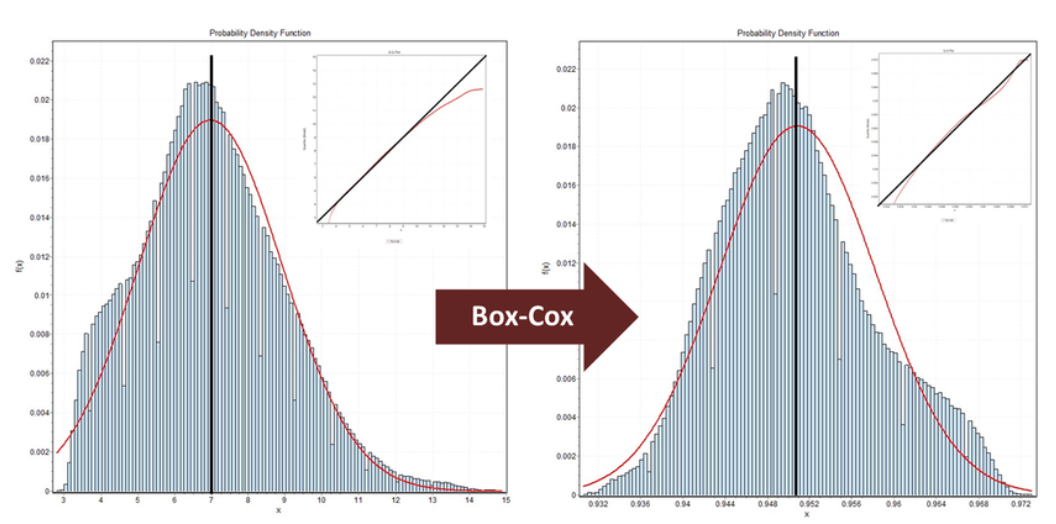

In [14]:
from sklearn.preprocessing import power_transform
data_BxCx = pd.DataFrame(power_transform(data_knnimpute,method="box-cox"))
data_BxCx.columns = data_knnimpute.columns

In [15]:
data_BxCx

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.301662,0.034559,-0.696409,-1.155384,-1.441568,-1.941339
1,0.133927,-0.776789,-0.513633,-0.682490,-1.441568,-1.733894
2,-1.133424,-0.429713,0.772939,-0.481905,-1.441568,-1.554515
3,-0.695278,1.453258,0.480592,-1.587927,-1.441568,-1.391232
4,-0.664472,0.217100,1.209918,-2.054572,-1.441568,-1.238962
...,...,...,...,...,...,...
148,-0.094552,0.068732,-0.852198,-0.876526,1.391890,1.107819
149,-0.339507,-0.474707,0.929106,-0.168676,1.391890,1.201106
150,-0.970695,0.045947,1.209918,-0.379147,1.391890,1.293445
151,-0.695278,-0.631712,-0.513633,-0.274738,1.391890,1.384877


#### 2.3.2.4 Using Yeo Johnson Transformation
While BoxCox only works with positive value, a more recent transformation method [Yeo Johnson](https://www.jstor.org/stable/2673623) can transform both positive and negative values

In [16]:
data_yeo_johnson = pd.DataFrame(power_transform(data_knnimpute,method="yeo-johnson"))
data_yeo_johnson.columns = data_knnimpute.columns
data_yeo_johnson

,Ozone,Solar.R,Wind,Temp,Month,Day
0,0.312382,0.032547,-0.697609,-1.155302,-1.437509,-1.892008
1,0.143850,-0.778833,-0.514183,-0.682500,-1.437509,-1.710395
2,-1.146647,-0.432089,0.774562,-0.481950,-1.437509,-1.544627
3,-0.698415,1.456436,0.482270,-1.587780,-1.437509,-1.389727
4,-0.666925,0.215443,1.210699,-2.054440,-1.437509,-1.242970
...,...,...,...,...,...,...
148,-0.086846,0.066778,-0.853953,-0.876499,1.395754,1.114792
149,-0.335471,-0.477072,0.930537,-0.168762,1.395754,1.210096
150,-0.980194,0.043954,1.210699,-0.379207,1.395754,1.304491
151,-0.698415,-0.633966,-0.514183,-0.274812,1.395754,1.398018


We can visualize the histogram with **seaborn** package.

Make sure that you install seaborn package in advance (Open the ML_SKLN Console (Not Notebook) and run this command:)

**pip install seaborn**

Once seaborn is installed, you can visualize the data:

/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Box-Cox Transformation')

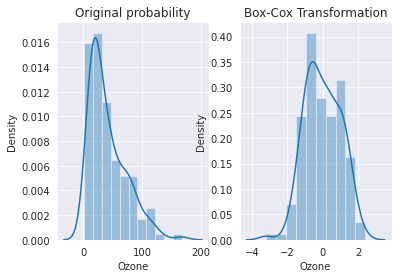

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style('darkgrid')

ax1 = plt.subplot(1,2,1)
sns.distplot(data_knnimpute["Ozone"])
ax1.set_title("Original probability")

ax2 = plt.subplot(1,2,2)
sns.distplot(data_BxCx["Ozone"])
ax2.set_title("Box-Cox Transformation")


# Data Partition with Scikit-Learn


## Data partition: training and testing

![image](https://user-images.githubusercontent.com/43855029/120378647-b1716080-c2ec-11eb-8693-60defbbad7e2.png)


- In Machine Learning, it is mandatory to have training and testing set. Some time a verification set is also recommended.
Here are some functions for spliting training/testing set in `sklearn`:

- `train_test_split`: create series of test/training partitions
- `Kfold` splits the data into k groups
- `StratifiedKFold` splits the data into k groups based on a grouping factor.
- `RepeatKfold`, `ShuffleSplit`, `LeaveOneOut`, `LeavePOut`

Due to time constraints, we will only focus on `train_test_split` and  `KFolds`

## 3.1 Scikit-Learn data

The `sklearn.datasets` package embeds some small sample datasets or toy [datasets](https://scikit-learn.org/stable/datasets.html)

In this workshop, we are going to use some toy datasets but in real life, we can import any csv or table dataset:

```
For each toy dataset, there are 4 varibles:
- **data**: numpy array of predictors/X
- **target**: numpy array of predictant/target/y
- **feature_names**: names of all predictors in X
- **target_names**: names of all predictand in y
```

For example, we will load the California housing dataset:

In [18]:
from sklearn.datasets import fetch_california_housing
data = fetch_california_housing()
print(data.data)
print(data.target)
print(data.feature_names)
print(data.target_names)

[[   8.3252       41.            6.98412698 ...    2.55555556
    37.88       -122.23      ]
 [   8.3014       21.            6.23813708 ...    2.10984183
    37.86       -122.22      ]
 [   7.2574       52.            8.28813559 ...    2.80225989
    37.85       -122.24      ]
 ...
 [   1.7          17.            5.20554273 ...    2.3256351
    39.43       -121.22      ]
 [   1.8672       18.            5.32951289 ...    2.12320917
    39.43       -121.32      ]
 [   2.3886       16.            5.25471698 ...    2.61698113
    39.37       -121.24      ]]
[4.526 3.585 3.521 ... 0.923 0.847 0.894]
['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']
['MedHouseVal']


Now we can assign the variables for input and output data:

In [19]:
X = data.data
y = data.target

## 3.2 Data spliting using train_test_split: **Single fold**
Here we use `train_test_split` to randomly split 60% data for training and the rest for testing:
    ![image](https://user-images.githubusercontent.com/43855029/114209883-22b81700-992d-11eb-83a4-c4ab1538a1e5.png)


In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)
#random_state: int, similar to R set_seed function

## 3.3 Data spliting using `K-fold`
- This is the Cross-validation approach.
- This is a resampling process used to evaluate ML model on limited data sample.
- The general procedure:
- Shuffle data randomly
- Split the data into **k** groups
For each group:
- Split into training & testing set
- Fit a model on each group's training & testing set
- Retain the evaluation score and summarize the skill of model



![image](https://user-images.githubusercontent.com/43855029/114211785-103edd00-992f-11eb-89d0-bbd7bd0c0178.png)

```python
from sklearn.model_selection import KFold
kf10 = KFold(n_splits=10,shuffle=True,random_state=20)
for train_index, test_index in kf10.split(data.target):
    X_train = X[train_index]
    y_train = y[train_index]
    X_test = X[test_index]
    y_test = y[test_index]

    model.fit(X_train, y_train) #Training the model, not running now
    y_pred = model.predict(X_test)
    print(f"Accuracy for the fold no. {i} on the test set: {accuracy_score(y_test, y_pred)}")
```    

# Evaluation Metrics with Scikit-Learn

# 4 Evaluation Metrics

- Evaluation Metric is an essential part in any Machine Learning project.
- It measures how good or bad is your Machine Learning model
- Different Evaluation Metrics are used for Regression model (Continuous output) or Classification model (Categorical output).


## 4.1 Regression model Evaluation Metrics

### 4.1.1 Correlation Coefficient (R) or Coefficient of Determination (R2):

![image](https://user-images.githubusercontent.com/43855029/120700259-72274900-c47f-11eb-8959-a4bbe4eafccc.png)


```python
from sklearn import metrics
metrics.r2_score(y_test,y_pred)
```

### 4.1.2 Root Mean Square Error (RMSE) or Mean Square Error (MSE)

![image](https://user-images.githubusercontent.com/43855029/120700533-c5010080-c47f-11eb-8050-b1cd8c63746e.png)


```python
from sklearn import metrics
metrics.mean_squared_error(y_test,y_pred,squared=False) # RMSE
metrics.mean_squared_error(y_test,y_pred,squared=True) # MSE
```

## 4.2. Classification Model Evaluation Metrics

### 4.2.1 Confusion Matrix
- A confusion matrix is a technique for summarizing the performance of a classification algorithm.
- You can learn more about Confusion Matrix [here](https://www.analyticsvidhya.com/blog/2020/04/confusion-matrix-machine-learning/)

For binary output (classification problem with only 2 output type, also most popular):

![image](https://user-images.githubusercontent.com/43855029/120687356-efe35880-c46f-11eb-950f-5feef237a4c1.png)

### 4.2.2 Accuracy

The most common metric for classification is accuracy, which is the fraction of samples predicted correctly as shown below:

![image](https://user-images.githubusercontent.com/43855029/120700619-dea24800-c47f-11eb-81c4-df090cad93da.png)


```python
from sklearn import metrics
metrics.accuracy_score(y_test,y_pred)
```

## 4.2.3 Precision

Precision is the fraction of predicted positives events that are actually positive as shown below:

![image](https://user-images.githubusercontent.com/43855029/120700808-1c9f6c00-c480-11eb-9ec8-597d02a76a94.png)

### 4.2.4 Recall

Recall (also known as sensitivity) is the fraction of positives events that you predicted correctly as shown below:

![image](https://user-images.githubusercontent.com/43855029/120700754-07c2d880-c480-11eb-81e1-7c7926452346.png)


### 4.2.5 F1 score

The f1 score is the harmonic mean of recall and precision, with a higher score as a better model. The f1 score is calculated using the following formula:

![image](https://user-images.githubusercontent.com/43855029/120701061-6ee08d00-c480-11eb-9ab1-71d905e6a491.png)

More information on Precision, Recall and F1 score can be found [here](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.precision_recall_fscore_support.html)


```python
metrics.precision_recall_fscore_support(y_test,y_pred,average='binary')
```

### 4.2.6 AUC-ROC curve
- ROC: Receiver Operating Characteristics:  probability curve
- AUC: Area Under The Curve: represents the degree or measure of separability.

![image](https://user-images.githubusercontent.com/43855029/120698991-ccbfa580-c47d-11eb-9f11-6e2acb00d46d.png)

- AUC = 1:   perfect prediction
- AUC = 0.8: model has 80% chance to predict the right class
    - AUC = 0.5: worst case, model has **NO** accuracy in prediction (random)
- AUC = 0:   the model is actually reciprocating the classes

![image](https://user-images.githubusercontent.com/43855029/120699552-84ed4e00-c47e-11eb-8089-54158439ad6f.png)

ROC Interpretation

![image](https://user-images.githubusercontent.com/43855029/133898061-2c7f5da6-c41b-41af-8a81-b65fef3c3184.png)

Code to calculate FPR, TPR:


```python
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test,y_pred)
```

Code to calculate AUC score:

```python
from sklearn.metrics import roc_auc_score
auc_score = roc_auc_score(y_test,y_pred)
```

We will go into detail how to plot AUC-ROC curve in the next chapters with a classification problem

# 5. Supervised Learning with continuous output
For this session, we will use several Machine Learning algorithm  to work with continuous output the supervised learning problem.
First of all, let's import the data:

## 5.1 Preprocessing


### 5.1.1 Import data


Let use the **california housing** data in previous episodes:


In [23]:
import pandas as pd
import numpy as np

from sklearn.datasets import fetch_california_housing

data = fetch_california_housing()

# Predictors/Input:
X = pd.DataFrame(data.data,columns=data.feature_names)

# Predictand/output:
y = pd.DataFrame(data.target,columns=data.target_names)

print(X.head())
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   MedHouseVal
0        4.526
1        3.585
2        3.521
3        3.413
4        3.422


### 5.1.2 Check missing data

In [24]:
print(X.isnull().sum())
print(y.isnull().sum())

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
dtype: int64
MedHouseVal    0
dtype: int64


Since there is no missing data, we move on to the next step:

### 5.1.3 Split model into training & testing set with 60% for training:

In [25]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

### 5.1.4 Visualization the inputs and output:

We can visualize the inputs and output data using pair plotting with seaborn package.

Make sure that you install seaborn package in advance (Open the ML_SKLN Console (Not Notebook) and run this command:)

 `pip install seaborn`


Once seaborn is installed, you can plot visualize the input/output data:


In [ ]:
import seaborn as sns
df = pd.concat([X_train,y_train], axis=1)
sns.pairplot(df)

![image](https://user-images.githubusercontent.com/43855029/154369953-8fcbc740-9d98-41b8-9c68-1f91149d59b2.png)

Now the input data is ready for supervised learning model, let's select several ML algorithms to work with:


## 5.2 Machine Learning algorithm with Linear Regression


### 5.2.1 Train model using Linear Regression with 1 predictor (for example Medium Income)

#### Fit a Linear model using LinearRegression model:

In [26]:
from sklearn.linear_model import LinearRegression
model_linreg1 = LinearRegression().fit(pd.DataFrame(X_train['MedInc']),y_train)

##### Apply trained model to testing data set and evaluate output using R-squared:

In [27]:
from sklearn import metrics
y_pred = model_linreg1.predict(pd.DataFrame(X_test['MedInc']))
print("R2 is: %1.2f" % metrics.r2_score(y_test,y_pred))
print("RMSE is: %1.2f" % metrics.mean_squared_error(y_test,y_pred,squared=False))

R2 is: 0.48
RMSE is: 0.84


We see that using 1 predictor/input, we obtain the output with corresponding R2 of 0.48 and RMSE = 0.84, which is not good enough. (The good R2 should be more than 0.7)
Therefore, we change the approach, still using Linear Regression but with more inputs:


### 5.2.2 Train model using Multi-Linear Regression (with 2 or more predictors)
In this section, we will build the model with 4 inputs ["MedInc","HouseAge","AveRooms","Population"]

#### Fit the training set and predict using test set


In [28]:
model_linreg = LinearRegression().fit(X_train[["MedInc","HouseAge","AveRooms","Population"]],y_train)
y_pred2 = model_linreg.predict(X_test[["MedInc","HouseAge","AveRooms","Population"]])

print("R2 is: %1.2f" % metrics.r2_score(y_test,y_pred2))
print("RMSE is: %1.2f"  % metrics.mean_squared_error(y_test,y_pred2,squared=False))

R2 is: 0.52
RMSE is: 0.80


Output is therefore better with smaller RMSE and higher R-squared:

```
R2 is: 0.52
RMSE is: 0.80
```

Still the model outcome is not good enough, so we try another algorithm:

### 5.2.3 Train model using Polynomial Regression

We can slightly improve this by using Polynomial Regression
![image](https://user-images.githubusercontent.com/43855029/115059030-f7e13c00-9eb3-11eb-9887-52461d7a87aa.png)

#### Preprocessing: polynomial regression with `degree of freedom=2`
the degree-2 polynomial features for 2 inputs (a & b) are [1, a, b, a^2, ab, b^2].

In [29]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=2)
X_poly = poly.fit_transform(X[["MedInc","HouseAge","AveRooms","Population"]])

X_train, X_test, y_train, y_test = train_test_split(pd.DataFrame(X_poly),y, train_size=0.6,random_state=123)

print(X_poly.shape)

(20640, 15)


We see that using 4 inputs data, with Polynomial regression, we have 15 input variables [1	a	b	c	d	a2	ab	ac	ad	b2	bc	bd	c2	cd	d2]

#### Fit the new dataset and predict output:

In [30]:
model_linreg_poly = LinearRegression().fit(X_train,y_train)
y_pred_poly = model_linreg_poly.predict(X_test)

print("R2 is: %1.2f " % metrics.r2_score(y_test,y_pred_poly))
print("RMSE is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_poly,squared=False))

R2 is: 0.55 
RMSE is: 0.78


The output is even better with R2 for testing data is 0.55 and lower RMSE.

The **R2=0.55** shows improvement using polynomial regression!

How about using more degrees of freedom?

#### Polynomial regression with `degree of freedom = 4`

Can we improve the result with more degree of freedome? Let's try using df=4:


In [31]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=4)
X_poly = poly.fit_transform(X[["MedInc","HouseAge","AveRooms","Population"]])

X_train4, X_test4, y_train4, y_test4 = train_test_split(pd.DataFrame(X_poly),y, train_size=0.6,random_state=123)

model_linreg_poly4 = LinearRegression().fit(X_train4,y_train4)
y_pred_poly4 = model_linreg_poly4.predict(X_test4)

print("R2 for 4 dof is: %1.2f " % metrics.r2_score(y_test4,y_pred_poly4))
print("RMSE for 4 dof is: %1.2f" % metrics.mean_squared_error(y_test4,y_pred_poly4,squared=False))


R2 for 4 dof is: -4.34 
RMSE for 4 dof is: 2.69


The R2 in sklearn can be negative, it arbitrarily means that the model is worse. More info on sklearn [r2_score](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.r2_score.html).

Why increasing the degree of freedom, my results getting worst?
It's called OVERFITTING

## 5.3 Overfitting

Overfitting occurs when we used lots of unesscessary input data for training process. It fits the training data so well that it is worse when applied to testing data:

![image](https://user-images.githubusercontent.com/43855029/153645935-b9eeebe5-424a-490a-aa95-006088a66b21.png)

Exercise 1: Let use all dataset to train the data to see if using all input data, we have overfitting?


Exercise 2: Let's check the R2 and RMSE for training set using 2 and 4 degree of freedom to see if the 4 dof is better than 2 dof in fitting back to training data?

## 5.4 Other Supervised ML algorithm for continuous data

There are many other ML algorithm that helps to overcome the issue of overfitting, for example:


### 5.4.1 Decision Tree

- Tree based learning algorithms are considered to be one of the best and mostly used supervised learning methods.
- Tree based methods empower predictive models with high accuracy, stability and ease of interpretation
- Non-parametric and non-linear relationships
- Types: Continuous (DecisionTreeRegressor) and Categorical (DecisionTreeClassifier)

![image](https://user-images.githubusercontent.com/43855029/153648313-da3a9a08-c4ad-48c9-bebd-df34f1651f98.png)

Let use all data in this exercise, the Decision Tree algorithm for continuous output in sklearn is called **DecisionTreeRegressor**


In [32]:
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.6,random_state=123)

from sklearn.tree import DecisionTreeRegressor
model_DT = DecisionTreeRegressor(max_depth=4).fit(X_train,y_train)
y_pred_DT = model_DT.predict(X_test)

print("R2 using Decision Tree is: %1.2f " % metrics.r2_score(y_test,y_pred_DT))
print("RMSE using Decision Tree is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_DT,squared=False))

R2 using Decision Tree is: 0.58 
RMSE using Decision Tree is: 0.76


Now we can see that Decision Tree helps to overcome the overfitting by trimming down the unnecessary input data.

#### Visualization the Decision Tree:

The following required graphviz model to be loaded when you requested for a Python Notebook.

![image](https://user-images.githubusercontent.com/43855029/153649826-000cc8ab-dfb9-43b7-b31c-26ecaf03d0a1.png)

In [ ]:
from sklearn import tree
import graphviz
dot_data = tree.export_graphviz(model_DT, out_file=None,
                                filled=True, rounded=True,
                                feature_names=data.feature_names,
                                special_characters=True)
graph = graphviz.Source(dot_data)
graph

![image](https://user-images.githubusercontent.com/43855029/154372355-9660f717-0bd4-4f32-aaf1-24ae092fc1ff.png)

### How to find the optimial parameters for any ML algorithm?

We use GridSearchCV to Search for the optimal parameters in Grid scale using Cross Validation approach

The following example showcase how to use GridSearchCV for DecisionTreeRegressor algorithm. Other algorithms are roughly the same with the slight changes in criterion.

In [36]:
# Creating a dictionary of parameters to use in GridSearchCV
from sklearn.model_selection import GridSearchCV

params = {    
    'criterion': ['squared_error', 'friedman_mse', 'absolute_error', 'poisson'],
    'max_depth':  [None, 2, 4, 6, 8, 10],
    'max_features': [None, 'sqrt', 'log2', 0.2, 0.4, 0.6, 0.8],
    'splitter': ['best', 'random']
}

clf = GridSearchCV(
    estimator=DecisionTreeRegressor(),
    param_grid=params,
    cv=5,
    n_jobs=5,
    verbose=1,
)

clf.fit(X_train, y_train)
print(clf.best_params_)

Fitting 5 folds for each of 336 candidates, totalling 1680 fits


[Parallel(n_jobs=5)]: Using backend LokyBackend with 5 concurrent workers.
[Parallel(n_jobs=5)]: Done 150 tasks      | elapsed:    0.8s
[Parallel(n_jobs=5)]: Done 1350 tasks      | elapsed:    7.6s


{'criterion': 'friedman_mse', 'max_depth': 8, 'max_features': None, 'splitter': 'best'}


[Parallel(n_jobs=5)]: Done 1680 out of 1680 | elapsed:    8.8s finished


### 5.4.2 Random Forest

![image](https://user-images.githubusercontent.com/43855029/153650870-13494bba-d440-4006-b98a-6fb1509d10d5.png)


- Random Forest is considered to be a panacea of all data science problems. On a funny note, when you can’t think of any algorithm (irrespective of situation), use random forest!
- Opposite to Decision Tree, Random Forest use bootstrapping technique to grow multiple tree
- Random Forest is a versatile machine learning method capable of performing both regression and classification tasks.
- It is a type of ensemble learning method, where a group of weak models combine to form a powerful model.
- The end output of the model is like a black box and hence should be used judiciously.


![image](https://user-images.githubusercontent.com/43855029/153650921-ecc70313-6e17-4bb6-92cb-bab11a39ab0c.png)


In [37]:
from sklearn.ensemble import RandomForestRegressor
model_RF = RandomForestRegressor(n_estimators=10).fit(X_train,y_train)
y_pred_RF = model_RF.predict(X_test)

print("R2 using Random Forest is: %1.2f " % metrics.r2_score(y_test,y_pred_RF))
print("RMSE using Random Forest is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_RF,squared=False))

/users/tuev/.conda/envs/ML_SKLN/lib/python3.6/site-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


R2 using Random Forest is: 0.78 
RMSE using Random Forest is: 0.54


Here we use n=10 estimators (growing using n trees in the forest) and The output is much better:

## 5.5 Ensemble Machine Learning

- Ensemble is a method in Machine Learning that combine decision from several ML models to obtain optimum output.
- Ensemble methods use multiple learning algorithms to obtain better predictive performance than could be obtained from any of the constituent learning algorithms alone. Unlike a statistical ensemble in statistical mechanics, which is usually infinite, a machine learning ensemble consists of only a concrete finite set of alternative models, but typically allows for much more flexible structure to exist among those alternatives
- The bonus point when applying both Bagging and Boosting in sklearn that they can be run in parallel!

### Types of Ensembles:

There are 2 main types of Ensembles in ML:

#### Bagging: Boostrap Aggregation

- Bagging, also known as bootstrap aggregation, is the ensemble learning method that is commonly used to reduce variance within a noisy dataset.
- In bagging, a random sample of data in a training set is selected with replacement—meaning that the individual data points can be chosen more than once.
- After several data samples are generated, these weak models are then trained independently, and depending on the type of task—regression or classification, for example—the average or majority of those predictions yield a more accurate estimate. 

- As a note, the **Random Forest** algorithm is considered an extension of the bagging method, using both bagging and feature randomness to create an uncorrelated forest of decision trees.


![image](https://user-images.githubusercontent.com/43855029/153652070-c067fc10-6322-49d1-92ed-b27532af11b6.png)


#### Boosting: Boost the weak predictors

- Boosting is an ensemble learning method that combines a set of weak learners into a strong learner to minimize training errors.
- In boosting, a random sample of data is selected, fitted with a model and then trained sequentially—that is, each model tries to compensate for the weaknesses of its predecessor.
- With each iteration, the weak rules from each individual classifier are combined to form one, strong prediction rule. 

![image](https://user-images.githubusercontent.com/43855029/153652096-4e93d213-58b9-4b27-88fa-e8b42a9cd6e5.png)


### 5.5.1 Bagging with RandomForest

We can apply Bagging to different ML algorithm like Linear Regression, Decision Tree, Random Forest, etc.
Following are the syntax:


In [ ]:
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor

model_RF = RandomForestRegressor()

model_bag_RF = BaggingRegressor(base_estimator=model_RF, n_estimators=100,
                                bootstrap=True, n_jobs=-1,
                                random_state=123)

model_bag_RF.fit(X_train, y_train)

y_pred_bagRF = model_bag_RF.predict(X_test)

print("R2 using Bagging Random Forest is: %1.2f " % metrics.r2_score(y_test,y_pred_bagRF))
print("RMSE using Baggin Random Forest is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_bagRF,squared=False))

Note that here we use n_estimators = 100 for bagging model (it grows 100 times the RandomForest model).
The n_jobs=-1 means that it utilizes all the cores inside a compute nodes that we have

And the output is very similar to RandomForest.

Let's try with some Boosting Ensemble approach:

### 5.5.2 Boosting with Adaboost

In [ ]:
from sklearn.ensemble import AdaBoostRegressor
model_ADA = AdaBoostRegressor(n_estimators=100, learning_rate=0.03).fit(X_train, y_train)
y_pred_ADA = model_ADA.predict(X_test)

print("R2 using Adaboost is: %1.2f " % metrics.r2_score(y_test,y_pred_ADA))
print("RMSE using Adaboost is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_ADA,squared=False))

The output is not as good as Bagging RF

### 5.5.3 Gradient Boosting Machine

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
model_GBM = GradientBoostingRegressor(n_estimators=100).fit(X_train,y_train)
y_pred_GBM = model_GBM.predict(X_test)

print("R2 using GBM is: %1.2f " % metrics.r2_score(y_test,y_pred_GBM))
print("RMSE using GBM is: %1.2f" % metrics.mean_squared_error(y_test,y_pred_GBM,squared=False))

The output is better than Adaboost.

### Which is better in Ensemble? Bagging or Boosting?

![image](https://user-images.githubusercontent.com/43855029/153654625-d7efe94d-1fc4-4ee6-9b4b-f897f52a909e.png)


- Ensemble overcome the limitation of using only single model
- Between bagging and boosting, there is no better approach without trial & error.